## OR problem Practice

In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [14]:
X = torch.tensor([[0, 0], 
                  [0, 1], 
                  [1, 0], 
                  [1, 1]])
Y = torch.tensor([[0], 
                  [1], 
                  [1], 
                  [1]])

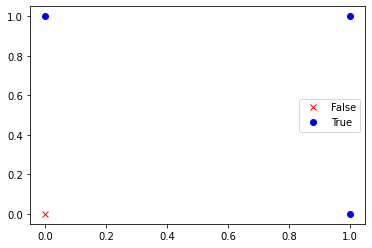

In [15]:
for x, y in zip(X,Y):
    if y == 0 :
        plt.plot(x[0], x[1], 'rx')
    else:
        plt.plot(x[0], x[1], 'bo')

plt.legend(['False', 'True'])
    
plt.show()

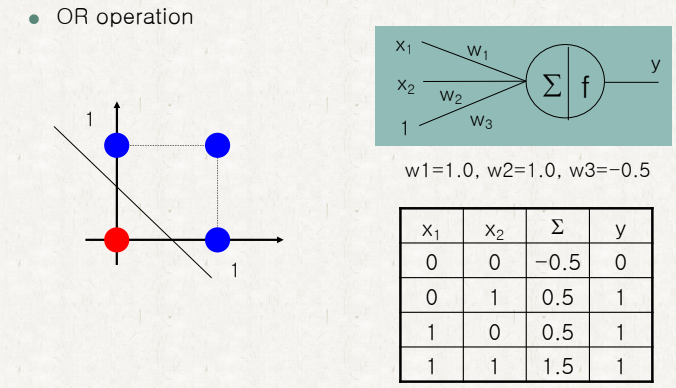

In [16]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

cuda


In [17]:
X = torch.FloatTensor([[0, 0], 
                       [0, 1], 
                       [1, 0], 
                       [1, 1]]).to(DEVICE)
Y = torch.FloatTensor([[0], 
                       [1], 
                       [1], 
                       [1]]).to(DEVICE)

In [18]:
def Sigmoid(num):
    return (1/(1+ torch.exp(-num)))

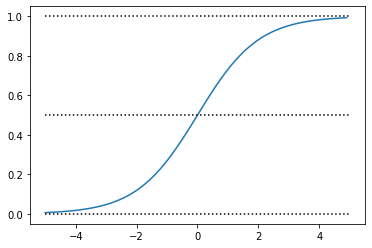

In [19]:
xforplot = torch.arange(-5, 5, 0.1)
yforplot = Sigmoid(xforplot)
plt.plot(xforplot,yforplot)
plt.plot([-5, 5], [1, 1], linestyle = ':',color = 'k')
plt.plot([-5, 5], [0, 0], linestyle = ':',color = 'k')
plt.plot([-5, 5], [0.5, 0.5], linestyle = ':',color = 'k')
plt.show()

In [20]:
class NeuralNet():
    def __init__(self):
        self.weight = torch.randn(3, requires_grad = True).to(DEVICE)

    def forward(self, input_tensor):
        self.result = input_tensor*self.weight[:2]
        self.result = self.result.sum() + self.weight[2]
        return Sigmoid(self.result)
 

model = NeuralNet()

In [21]:
print(model.forward(torch.tensor([0,0]).to(DEVICE))>0.5)
print(model.forward(torch.tensor([0,1]).to(DEVICE))>0.5)
print(model.forward(torch.tensor([1,0]).to(DEVICE))>0.5)
print(model.forward(torch.tensor([1,1]).to(DEVICE))>0.5)

tensor(True, device='cuda:0')
tensor(False, device='cuda:0')
tensor(True, device='cuda:0')
tensor(False, device='cuda:0')


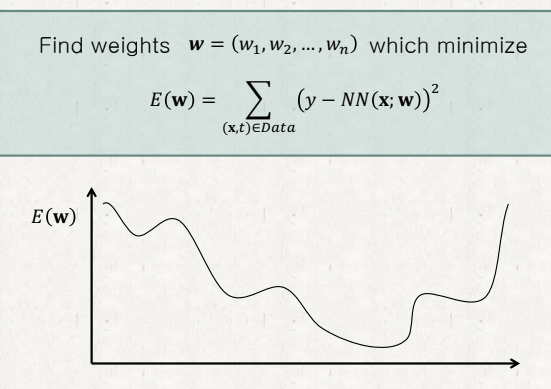

In [22]:
model.weight.retain_grad()
loss = 0

for idx, x in enumerate(X):
    out = model.forward(x)
    loss += (out - Y[idx])**2

In [23]:
# Learning Rate와 Loss를 변화시키며 학습이 어떻게 진행되는지 관찰해보세요.

learning_rate = 0.1

for epoch in range(1000):
    model.weight.retain_grad()
    loss = 0

    for idx, x in enumerate(X):
        out = model.forward(x)      # prediction
        loss += (out - Y[idx])**2   # L2 Loss (MSE Loss)
        # loss += torch.abs(out - Y[idx]) # L1 Loss
    
    # Gradient Descent by Pytorch
    loss.backward()
    model.weight = model.weight - learning_rate*model.weight.grad   
    model.weight.grad = None

    if epoch%50 == 0:
        print('=======================epoch {}======================'.format(epoch))
        print('model operation : {:.2f} * x1 + {:.2f} * x2 + {:.2f}'.format(model.weight[0],model.weight[1],model.weight[2]))
        print('LOSS : {}'.format(loss))

=======================epoch 0======================
model operation : 0.01 * x1 + -0.88 * x2 + 0.20
LOSS : tensor([2.3827], device='cuda:0', grad_fn=<AddBackward0>)
=======================epoch 50======================
model operation : 1.25 * x1 + 0.63 * x2 + 1.36
LOSS : tensor([1.0251], device='cuda:0', grad_fn=<AddBackward0>)
=======================epoch 100======================
model operation : 1.63 * x1 + 1.16 * x2 + 1.35
LOSS : tensor([0.9344], device='cuda:0', grad_fn=<AddBackward0>)
=======================epoch 150======================
model operation : 1.92 * x1 + 1.55 * x2 + 1.09
LOSS : tensor([0.8741], device='cuda:0', grad_fn=<AddBackward0>)
=======================epoch 200======================
model operation : 2.20 * x1 + 1.91 * x2 + 0.66
LOSS : tensor([0.7950], device='cuda:0', grad_fn=<AddBackward0>)
=======================epoch 250======================
model operation : 2.52 * x1 + 2.30 * x2 + 0.14
LOSS : tensor([0.6897], device='cuda:0', grad_fn=<AddBackward0>)
